# TP 1: Data mining en imágenes


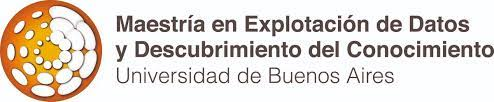

_Data mining en Ciencia y Tecnología_  
2do cuatrimestre 2023

Integrantes del grupo:  
Zambrano, Vanesa; Pirola, Malena; Gianni, Tomás; Bettachini, Víctor

## Enunciado

Transcribo el texto del enunciado como 
>  comentarios

para ordenar lo que se vuelque aquí

## 1. Introducción

> Dentro de la minería de datos encontramos el procesamiento de imágenes como un campo en constante evolución. Hoy en día, son muchas las aplicaciones que funcionan a partir de cámaras, sensores, equipamiento médico, o satélites. Estos sistemas permiten extraer una gran cantidad de información en formato de imagen, lo cual hace muy dificil la inspección humana de la misma. Poder extraer características y poder agrupar las imágenes en base de ellas es sumamente importante la utilización de algoritmos de aprendizaje automático.

## 2. Objetivos

> Realizar un agrupamiento de un conjunto de imágenes. Comparar las segmentaciones genereadas por diferentes algoritmos de clustering en base a métodos de validación interna
y externa.

> En función del dataset elegido se podrá definir una pregunta específica, está puede estar guiada por una pregunta básica o por una aplicación. Les proponemos pensar esta preguntar e incluirla como guía del trabajo. Deberá estar motivada en la sección Introducción (idealmente con bibliografía) y discutida en la sección Discusión o Conclusiones

## 3. Estructura de los datos

> Deberán elegir un dataset, donde haya al menos 5 categorias. Dejamos ejemplos de algunos sets de datos que pueden usar, pero pueden elegir otro que sea de su interés tomando estos como parámetro.
> - **Imágenes naturales**: 6899 imágenes de 8 clases diferentes (aviones, autos, gatos, flores, perros, frutas, motos y personas): https://www.kaggle.com/datasets/prasunroy/
natural-images [1].
> - **Imágenes de tipos de arroz**: 5 clases de arroz diferentes (Arborio, Basmati, Ipsala, Jasmine, Karacadag, ): https://www.kaggle.com/datasets/muratkokludataset/rice-image-dat
[2].
> - **Ropa**: Varias categorías de prendas de vestir. Hay que hacer una subsampleo de la muestra porque es muy grande: https://www.kaggle.com/datasets/paramaggarwal/
fashion-product-images-small
> - **Galaxias**: Distintas categorias de galaxias anotadas por voluntarios (online). Dataset: https://astronn.readthedocs.io/en/latest/galaxy10.html, Plataforma para anotar: https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/classify  
> 
> [1] Prasun Roy, Subhankar Ghosh, Saumik Bhattacharya, and Umapada Pal. Effects of degradations on deep neural network architectures. arXiv preprint arXiv:1807.10108, 2018.  
> [2] Ilkay Cinar and Murat Koklu. Classification of rice varieties using artificial intelligence methods. International Journal of Intelligent Systems and Applications in Engineering, 7(3):188–194, 2019.  

Se trabaja a continuación sobre el conjunto de **Imágenes de tipos de arroz**.

## 4. Preparación de los datos
>La preparación de los datos incluye los siguientes pasos:  
>(a) Levantar las imágenes y sus etiquetas.  
>(b) Documentar las propiedades del dataset a utilizar.  
>(c) Describir sus atributos, de forma semejante a lo realizado en el pre-informe.  
>(d) Recuerde que las imágenes deben ser comparables en color, valor, rango y tamaño.  

### (a) Levantar las imágenes y sus etiquetas

In [1]:
# Determina entorno de ejecución: local o Colab

# if (firstrun):
if('google.colab' in str(get_ipython() ) ):
    environment= 'google'
else:
    import os
    if (os.environ.get('PWD')=='/kaggle/working'):
        environment= 'kaggle'
    else:
        environment= 'local'
print(environment)

local


In [2]:
# Directorio base ( cambiar según el sistema de archivos de cada uno)

# if (firstrun):
if( environment== 'local' ):
    # system_path = "C:/Users/vanes/Documents/UBA/2do_cuatrimestre/DMCyT/TP/" # Vanesa
    system_path = '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/' # Víctor
elif( ( environment== 'google' ) ): 
    from google.colab import drive
    drive.mount('/content/drive')
    system_path = "/content/drive/MyDrive/maestría/cienciaTecnología/"
elif( ( environment== 'kaggle' ) )  :
    a= 1

# Diretorio del dataset
dataset_path = system_path + "tp1_dmcyt2023/datasets/Rice_Image_Dataset"

In [3]:
import os

In [4]:
# Clases en el dataset

# Tomado de https://www.kaggle.com/code/gustavo9898/pytorch-rice-image-classification 
classes = []
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    if os.path.isdir(folder_path):
        classes.append(folder)
# remove from list classes random_sample_rice_images
sample_folder_name = 'random_sample_rice_images'
if sample_folder_name in classes:
    classes.remove(sample_folder_name)
print(classes)

['Basmati', 'Jasmine', 'Ipsala', 'Karacadag', 'Arborio']


In [20]:
# paths to classes
classes_paths = []
for clase in classes:
  classes_paths.append(dataset_path + "/" + clase + '/')
# print(classes_paths)

['/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Basmati/', '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Jasmine/', '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Ipsala/', '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Karacadag/', '/home/vbettachini/documents/universitet/FCEyN/maestríaDatos/cienciaTecnología/tp1_dmcyt2023/datasets/Rice_Image_Dataset/Arborio/']


In [37]:
# paths to images
path = []
for class_path in classes_paths:
  path.extend(
    [
      os.path.join(class_path, file)
      for file in os.listdir(class_path )
      if file.endswith('.jpg')
    ]
  )
path = sorted(path)
print(len(path))

75000


In [ ]:
# if (firstrun):
try:
  import numpy as np
except:
  ! pip install numpy
  import numpy as np

In [42]:
import csv

In [75]:
# Genero archivo de etiquetas
mis_etiquetas = [image_path.split('/')[-2] for image_path in path]
stacked = np.column_stack((path, mis_etiquetas))

# writes stacked to a csv file with the heading 'file' and 'label'
csv_file_path = os.path.join(dataset_path, 'labels.csv')
with open(csv_file_path, mode='w', newline='') as dataset_file:
  csv_writer = csv.writer(dataset_file)
  csv_writer.writerow(['file', 'label'])
  csv_writer.writerows(stacked)

### (b) Documentar las propiedades del dataset a utilizar

El dataset elegido es el de imágenes de tipo de arroz: posee imágenes de granos individuales, en escala de grises, y pertenecientes a 5 categorias distintas (Arborio, Basmati, Ipsala, Jasmine y Karacadag), contando con 15000 fotos para cada categoría; en total, el dataset seleccionado cuenta con 75000 imagenes. Los datos se encuentran ordenados en carpetas, una por cada tipo de arroz.

### (c) Describir sus atributos, de forma semejante a lo realizado en el pre-informe.  

### (d) Recuerde que las imágenes deben ser comparables en color, valor, rango y tamaño.  

#### Se comprueba la dimensión de las imágenes:

In [55]:
# if (firstrun):
try:
  import cv2
except:
  ! pip install opencv-python
  import cv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 2.2 MB/s eta 0:00:00m eta 0:00:010:00:01m


In [57]:
import random

In [60]:
import matplotlib.pyplot as plt

(250, 250, 3)


(-0.5, 249.5, 249.5, -0.5)

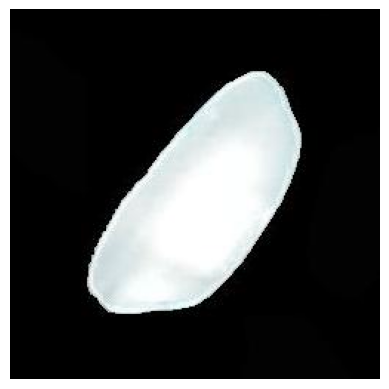

In [61]:
# Toma una imagen al azar y verifica su forma (shape)
img_BGR = cv2.imread(path[random.randint(0, len(path ) ) ] )
# cv2 asume un orden de coleres BGR en los arrays, se convierte a RGB para mostrarle correctamente con matplotlib
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
print(img_BGR.shape)
plt.imshow(img_BGR)
plt.axis('off')

Se verifica que las demás imágenes sean también de 250 x 250 x 3.

In [62]:
images_odd_shape = []
for i in range(len(path)):
  if cv2.imread(path[i]).shape != (250,250,3):
    images_odd_shape.append(i)
images_odd_shape

KeyboardInterrupt: 

Como la lista "images_odd_shape" está vacía, comprobamos que todas las imágenes tienen la misma dimensión y los 3 canales.

#### Muestreo de 20 imágenes al azar de cada tipo de arroz

In [101]:
from itertools import compress

In [118]:
def veinteImágenes(variedad_buscada):
  positivos = [(variedad == variedad_buscada) for variedad in mis_etiquetas]
  mask = np.array(positivos, dtype=bool)
  ine = list(compress(path, mask))
  plt.figure(num=None, figsize=(12,4)) 
  j=1
  for imagen in random.sample(ine, 20):
    plt.subplot(3,10,j)
    img = cv2.imread(imagen)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img )
    plt.axis('off')
    j=j+1

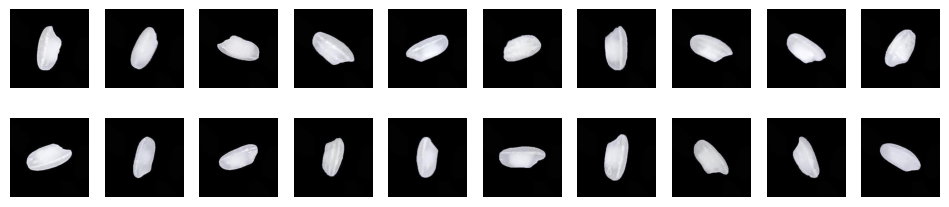

In [119]:
variedad_buscada = 'Arborio'
veinteImágenes(variedad_buscada)

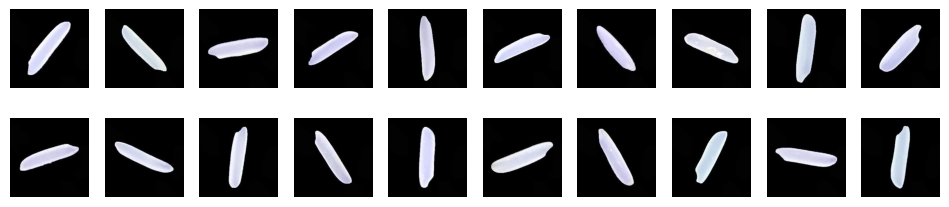

In [120]:
variedad_buscada = 'Basmati'
veinteImágenes(variedad_buscada)

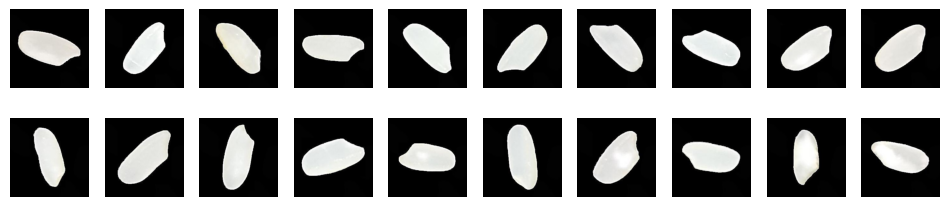

In [121]:
variedad_buscada = 'Ipsala'
veinteImágenes(variedad_buscada)

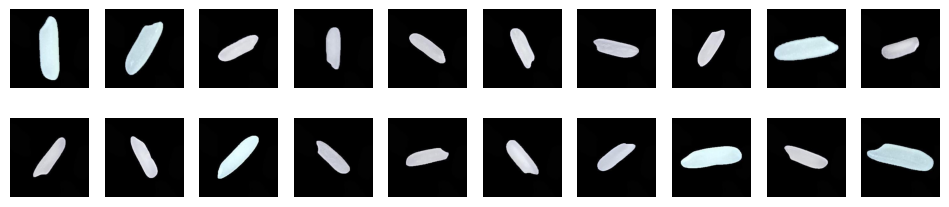

In [122]:
variedad_buscada = 'Jasmine'
veinteImágenes(variedad_buscada)

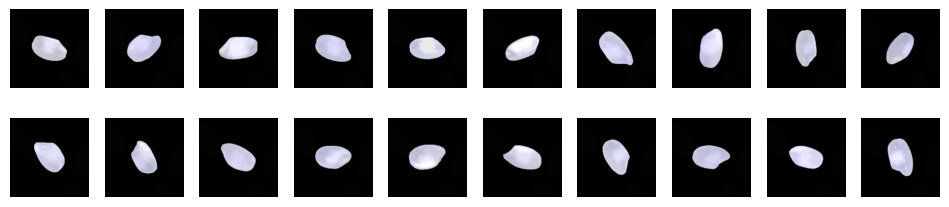

In [124]:
variedad_buscada = 'Karacadag'
veinteImágenes(variedad_buscada)

## 5. Extracción de características _features_

> Se propone el uso de un modelo de redes neuronales convolucionales que es muy utilizado en el campo de la visión [3]. VGG16, es un modelo de Transfer Learning que posee 16 capas (con pesos) pre entrenado para clasificación de imágenes. Dicho modelo está implementado en Keras https://keras.io/api/applications/vgg/ y por default trabaja con imágenes de 224x224.  
> Este modelo es entrenado de forma supervisada para clasificación y aprende en las capas intermedias características que son relevante para dicha tarea. En el presente trabajo les proponemos utilizar estas características utilizando la salida de las capas intermedias.  
> Siguiendo los pasos descriptos en las clases, explorar el output del modelo y documentar el proceso y las características del mismo.

> [3] Karen Simonyan and Andrew Zisserman. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556, 2014.  

In [45]:
def extract_features(file, model):
    # levanta imagen como array 224x224
    img = load_img(file, target_size=(224,224))
    # convierte img a numpy array (originalmente es 'PIL.Image.Image')
    img = np.array(img)
    # reshape para tener formato necesario para el modelo (num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3)
    # prepara imagen para modelo (función de keras)
    imgx = preprocess_input(reshaped_img)
    # extrae features
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [46]:
def preprocess(lista, model):
    datays = {}
    for i in lista:
      featuress = extract_features(i, model)
      datays[i] = featuress
    # lista de filenames
    filenmss = np.array(list(datays.keys()))

    # lista de features
    featsss = np.array(list(datays.values()))

    # reshape 4096 features por el número de imagens
    # print(featsss.shape)
    featsss = featsss.reshape(-1,4096)
    return filenmss, featsss

In [48]:
# if (firstrun):
try:
  from keras.models import Model
except:
  ! pip install keras
  from keras.models import Model

# Tensorflow model
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

2023-10-01 22:38:38.123446: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 22:38:38.665850: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 22:38:38.675454: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-01 22:38:40.496836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-10-01 22:38:42.976205: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-01 22:38:43.212126: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-10-01 2

Juan: Toma la capa -2 (output), la ante-última.
Cosas por hacer (probar)
- Probar con otra capa intermedia (no la terminal)
  - No es la última, más abstracta, sino tal vez una anterior

In [49]:
# if (firstrun):
try:
    # from keras.preprocessing.image import load_img
    from tensorflow.keras.utils  import load_img
    #from keras.preprocessing.image import img_to_array
    from tensorflow.keras.utils import img_to_array
except:
    ! pip install tensorflow
    from tensorflow.keras.utils  import load_img
    from tensorflow.keras.utils import img_to_array

¿Por qué `tensorflow.keras` y `keras`?  
Fuente: [Stack overflow | keras vs. tensorflow.python.keras - which one to use?](https://stackoverflow.com/questions/48893528/keras-vs-tensorflow-python-keras-which-one-to-use)
> tensorflow.python.keras is just a bundle of keras with a single backend inside tensorflow package. This allows you to start using keras by installing just pip install tensorflow.
> 
> keras package contains full keras library with three supported backends: tensorflow, theano and CNTK. If you even wish to switch between backends, you should choose keras package. This approach is also more flexible because it allows to install keras updates independently from tensorflow (which may not be easy to update, for example, because the next version may require a different version of CUDA driver) or vice versa. For this reason, I prefer to install keras as another package.

In [50]:
## Levanta archivos y extrae features
names, feat = preprocess(path, model)

1/1 [==============================] - 0s 350ms/step


KeyboardInterrupt: 

In [ ]:
# Guarda features y nombres de archivos en un .npz para levantar en otro cuaderno
np.savez_compressed(dataset_path + '/test_vgg16output.npz', feat = feat, names = names)

In [ ]:
from sys import getsizeof
getsizeof(feat)/1024**2 # MB